# Assignment No. 3

## Part 1 - A fully connected ANN implemented in PyTorch
The model will be used to compare the predicted performance between it and the revised code (ch11_two_layers) and the original code (single hidden layer).

In [1]:
!pip install torch

In [2]:
!pip install torch torchvision

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision

In [3]:
batch_size_train = 64
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 360040798.82it/s]

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 28549538.96it/s]


Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 108016921.20it/s]

Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 7006446.77it/s]


Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw



In [4]:
batch_size_test = 1000
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [5]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [6]:
example_data

tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.424

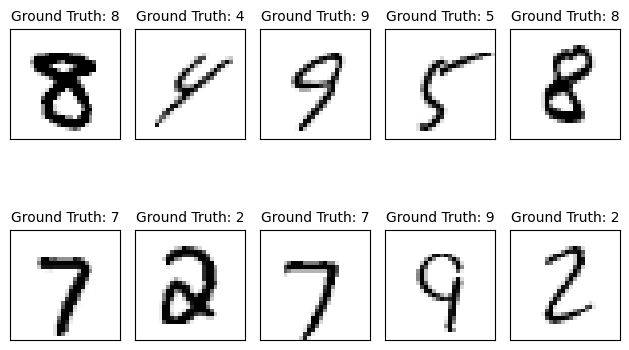

In [7]:
import matplotlib.pyplot as plt

# example_data is a NumPy array containing the examples and ground truth labels
# example_data[:, :-1] contains the examples (images)
# example_data[:, -1] contains the ground truth labels

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    ax[i].imshow(example_data[i][0].reshape(28, 28), cmap='Greys')
    ax[i].set_title(f'Ground Truth: {int(example_targets[i])}', fontsize=10)

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, num_features, num_hidden1, num_hidden2, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(num_features, num_hidden1)
        self.fc2 = nn.Linear(num_hidden1, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the network architecture and other hyperparameters
num_features = 784  # Number of input features (assuming 28x28 images)
num_hidden1 = 128   # Number of units in the first hidden layer
num_hidden2 = 64    # Number of units in the second hidden layer
num_classes = 10    # Number of output classes (for MNIST dataset)

# Create an instance of the NeuralNet model
model = NeuralNet(num_features, num_hidden1, num_hidden2, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.1)

X_train_tensor = example_data
y_train_tensor = example_targets

# Train the model
num_epochs = 50
batch_size = 100
for epoch in range(num_epochs):
    # Shuffle the data and create minibatches
    indices = torch.randperm(X_train_tensor.shape[0])
    for i in range(0, X_train_tensor.shape[0], batch_size):
        batch_indices = indices[i:i + batch_size]
        batch_inputs = X_train_tensor[batch_indices]
        batch_labels = y_train_tensor[batch_indices]

        # Forward pass
        outputs = model(batch_inputs.view(-1, num_features))  # Reshape batch_inputs to (batch_size, num_features)

        # Compute the loss
        loss = criterion(outputs, batch_labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

# Testing the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_train_tensor.view(-1, num_features))  # Reshape X_train_tensor to (batch_size, num_features)
    test_loss = criterion(test_outputs, y_train_tensor)
    _, predicted_labels = torch.max(test_outputs, 1)
    accuracy = (predicted_labels == y_train_tensor).sum().item() / len(y_train_tensor)
    print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50, Loss: 2.0247
Epoch 2/50, Loss: 1.3419
Epoch 3/50, Loss: 0.7902
Epoch 4/50, Loss: 0.6169
Epoch 5/50, Loss: 0.6321
Epoch 6/50, Loss: 0.5668
Epoch 7/50, Loss: 0.3474
Epoch 8/50, Loss: 0.3059
Epoch 9/50, Loss: 0.3233
Epoch 10/50, Loss: 0.2089
Epoch 11/50, Loss: 0.1534
Epoch 12/50, Loss: 0.2178
Epoch 13/50, Loss: 0.1576
Epoch 14/50, Loss: 0.1616
Epoch 15/50, Loss: 0.1199
Epoch 16/50, Loss: 0.1252
Epoch 17/50, Loss: 0.0813
Epoch 18/50, Loss: 0.0670
Epoch 19/50, Loss: 0.0482
Epoch 20/50, Loss: 0.0693
Epoch 21/50, Loss: 0.0649
Epoch 22/50, Loss: 0.0372
Epoch 23/50, Loss: 0.0486
Epoch 24/50, Loss: 0.0424
Epoch 25/50, Loss: 0.0309
Epoch 26/50, Loss: 0.0379
Epoch 27/50, Loss: 0.0297
Epoch 28/50, Loss: 0.0302
Epoch 29/50, Loss: 0.0250
Epoch 30/50, Loss: 0.0178
Epoch 31/50, Loss: 0.0132
Epoch 32/50, Loss: 0.0174
Epoch 33/50, Loss: 0.0189
Epoch 34/50, Loss: 0.0149
Epoch 35/50, Loss: 0.0145
Epoch 36/50, Loss: 0.0175
Epoch 37/50, Loss: 0.0142
Epoch 38/50, Loss: 0.0135
Epoch 39/50, Loss: 0.

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the neural network architecture
class NeuralNet(nn.Module):
    def __init__(self, num_features, num_hidden1, num_hidden2, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(num_features, num_hidden1)
        self.fc2 = nn.Linear(num_hidden1, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

X_train_tensor = example_data.view(example_data.size(0), -1)  # Flatten the input images
y_train_tensor = example_targets.squeeze()  # Convert y_train_tensor to a 1-dimensional tensor

# Define the network architecture and other hyperparameters
num_features = X_train_tensor.shape[1]  # Number of input features
num_hidden1 = 128   # Number of units in the first hidden layer
num_hidden2 = 64    # Number of units in the second hidden layer
num_classes = torch.max(y_train_tensor) + 1  # Number of output classes

# Create an instance of the NeuralNet model
model = NeuralNet(num_features, num_hidden1, num_hidden2, num_classes)

# Define the loss function (CrossEntropyLoss) and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train the model
epoch_loss = []  # Store the CrossEntropy loss for each epoch
num_epochs = 50
batch_size = 100
for epoch in range(num_epochs):
    # Shuffle the data and create minibatches
    indices = torch.randperm(X_train_tensor.shape[0])
    for i in range(0, X_train_tensor.shape[0], batch_size):
        batch_indices = indices[i:i + batch_size]
        batch_inputs = X_train_tensor[batch_indices]
        batch_labels = y_train_tensor[batch_indices]

        # Forward pass
        outputs = model(batch_inputs)

        # Compute the CrossEntropy loss
        loss = criterion(outputs, batch_labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epoch_loss.append(loss.item())
    print(f"Epoch {epoch + 1}/{num_epochs}, CrossEntropy Loss: {loss.item():.4f}")

# Testing the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_train_tensor.view(-1, num_features))  # Reshape X_train_tensor to (batch_size, num_features)
    test_loss = criterion(test_outputs, y_train_tensor)
    _, predicted_labels = torch.max(test_outputs, 1)
    accuracy = (predicted_labels == y_train_tensor).sum().item() / len(y_train_tensor)
    print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50, CrossEntropy Loss: 1.9996
Epoch 2/50, CrossEntropy Loss: 1.3263
Epoch 3/50, CrossEntropy Loss: 0.9561
Epoch 4/50, CrossEntropy Loss: 0.6917
Epoch 5/50, CrossEntropy Loss: 0.4443
Epoch 6/50, CrossEntropy Loss: 0.3773
Epoch 7/50, CrossEntropy Loss: 0.4641
Epoch 8/50, CrossEntropy Loss: 0.3330
Epoch 9/50, CrossEntropy Loss: 0.3167
Epoch 10/50, CrossEntropy Loss: 0.2742
Epoch 11/50, CrossEntropy Loss: 0.2406
Epoch 12/50, CrossEntropy Loss: 0.1794
Epoch 13/50, CrossEntropy Loss: 0.1446
Epoch 14/50, CrossEntropy Loss: 0.1562
Epoch 15/50, CrossEntropy Loss: 0.0785
Epoch 16/50, CrossEntropy Loss: 0.1117
Epoch 17/50, CrossEntropy Loss: 0.0815
Epoch 18/50, CrossEntropy Loss: 0.1345
Epoch 19/50, CrossEntropy Loss: 0.0611
Epoch 20/50, CrossEntropy Loss: 0.0721
Epoch 21/50, CrossEntropy Loss: 0.0646
Epoch 22/50, CrossEntropy Loss: 0.0624
Epoch 23/50, CrossEntropy Loss: 0.0478
Epoch 24/50, CrossEntropy Loss: 0.0314
Epoch 25/50, CrossEntropy Loss: 0.0407
Epoch 26/50, CrossEntropy Loss: 0.

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the neural network architecture
class NeuralNet(nn.Module):
    def __init__(self, num_features, num_hidden1, num_hidden2, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(num_features, num_hidden1)
        self.fc2 = nn.Linear(num_hidden1, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

X_train_tensor = example_data.view(example_data.size(0), -1)  # Flatten the input images
y_train_tensor = example_targets.squeeze()  # Convert y_train_tensor to a 1-dimensional tensor

# Define the network architecture and other hyperparameters
num_features = 784
num_hidden1 = 128   # Number of units in the first hidden layer
num_hidden2 = 64    # Number of units in the second hidden layer
num_classes = 10

# Create an instance of the NeuralNet model
model = NeuralNet(num_features, num_hidden1, num_hidden2, num_classes)

# Define the loss function (CrossEntropyLoss) and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Convert numpy arrays to PyTorch tensors for validation data
X_train_tensor = torch.tensor(example_data, dtype=torch.float32)
y_train_tensor = torch.tensor(example_targets, dtype=torch.long)

# Reshape the input data to a 2D tensor
X_train_tensor = X_train_tensor.view(-1, num_features)

# Split the data into training and validation sets
train_size = int(0.8 * len(X_train_tensor))
X_train_tensor, X_valid_tensor = X_train_tensor[:train_size], X_train_tensor[train_size:]
y_train_tensor, y_valid_tensor = y_train_tensor[:train_size], y_train_tensor[train_size:]

# Train the model
epoch_loss = []  # Store the CrossEntropy loss for each epoch
epoch_train_acc = []  # Store the training accuracy for each epoch
epoch_valid_acc = []  # Store the validation accuracy for each epoch
num_epochs = 50
batch_size = 100
for epoch in range(num_epochs):
    # Shuffle the data and create minibatches
    indices = torch.randperm(X_train_tensor.shape[0])
    for i in range(0, X_train_tensor.shape[0], batch_size):
        batch_indices = indices[i:i + batch_size]
        batch_inputs = X_train_tensor[batch_indices]
        batch_labels = y_train_tensor[batch_indices]

        # Forward pass
        outputs = model(batch_inputs)

        # Compute the CrossEntropy loss
        loss = criterion(outputs, batch_labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Compute training and validation accuracies for this epoch
    with torch.no_grad():
        model.eval()
        train_outputs = model(X_train_tensor)
        train_accuracy = (torch.argmax(train_outputs, dim=1) == y_train_tensor).float().mean().item()
        valid_outputs = model(X_valid_tensor)
        valid_accuracy = (torch.argmax(valid_outputs, dim=1) == y_valid_tensor).float().mean().item()
        model.train()

    epoch_loss.append(loss.item())
    epoch_train_acc.append(train_accuracy)
    epoch_valid_acc.append(valid_accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}, CrossEntropy Loss: {loss.item():.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Valid Accuracy: {valid_accuracy:.4f}")

# Testing the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_train_tensor.view(-1, num_features))  # Reshape X_train_tensor to (batch_size, num_features)
    test_loss = criterion(test_outputs, y_train_tensor)
    _, predicted_labels = torch.max(test_outputs, 1)
    accuracy = (predicted_labels == y_train_tensor).sum().item() / len(y_train_tensor)
    print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {accuracy * 100:.2f}%")

<ipython-input-13-e976044ec798>:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(example_data, dtype=torch.float32)
<ipython-input-13-e976044ec798>:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(example_targets, dtype=torch.long)


Epoch 1/50, CrossEntropy Loss: 2.0854, Train Accuracy: 0.4812, Valid Accuracy: 0.4400
Epoch 2/50, CrossEntropy Loss: 1.5510, Train Accuracy: 0.6712, Valid Accuracy: 0.6400
Epoch 3/50, CrossEntropy Loss: 1.1985, Train Accuracy: 0.6975, Valid Accuracy: 0.6900
Epoch 4/50, CrossEntropy Loss: 0.8831, Train Accuracy: 0.7638, Valid Accuracy: 0.7550
Epoch 5/50, CrossEntropy Loss: 0.6824, Train Accuracy: 0.7337, Valid Accuracy: 0.7000
Epoch 6/50, CrossEntropy Loss: 0.5650, Train Accuracy: 0.8913, Valid Accuracy: 0.8550
Epoch 7/50, CrossEntropy Loss: 0.5053, Train Accuracy: 0.8775, Valid Accuracy: 0.8650
Epoch 8/50, CrossEntropy Loss: 0.2327, Train Accuracy: 0.9000, Valid Accuracy: 0.8500
Epoch 9/50, CrossEntropy Loss: 0.4436, Train Accuracy: 0.9125, Valid Accuracy: 0.8600
Epoch 10/50, CrossEntropy Loss: 0.2552, Train Accuracy: 0.9275, Valid Accuracy: 0.8550
Epoch 11/50, CrossEntropy Loss: 0.2533, Train Accuracy: 0.9463, Valid Accuracy: 0.8800
Epoch 12/50, CrossEntropy Loss: 0.3072, Train Accura

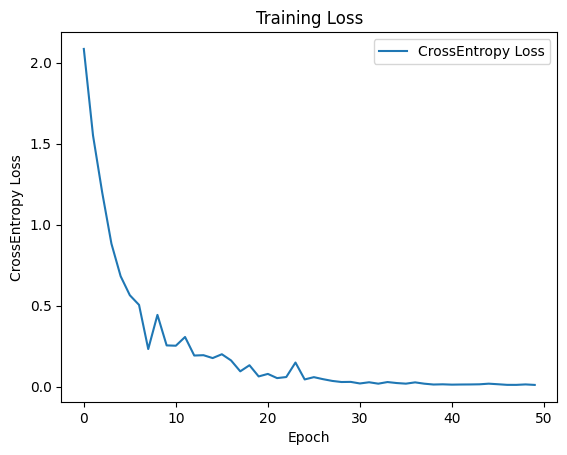

In [14]:
# Plot the training loss (CrossEntropy) over the epochs
plt.plot(range(len(epoch_loss)), epoch_loss, label='CrossEntropy Loss')
plt.ylabel('CrossEntropy Loss')
plt.xlabel('Epoch')
plt.title('Training Loss')
plt.legend()
plt.show()

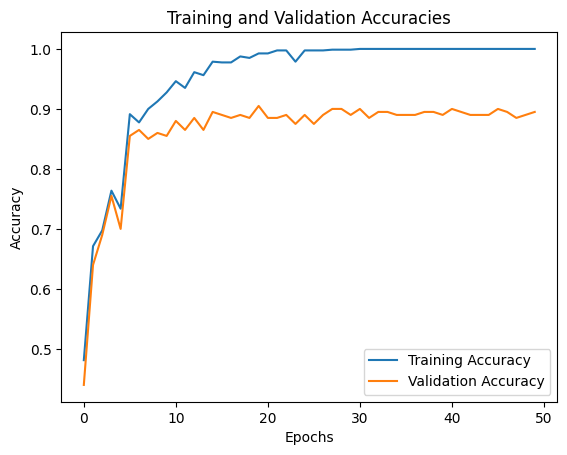

In [15]:
# Plot the training and validation accuracies over the epochs
plt.plot(range(len(epoch_train_acc)), epoch_train_acc, label='Training Accuracy')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracies')
plt.show()

<ipython-input-16-a606842649f2>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  example_image_tensor = torch.tensor(example_image, dtype=torch.float32)


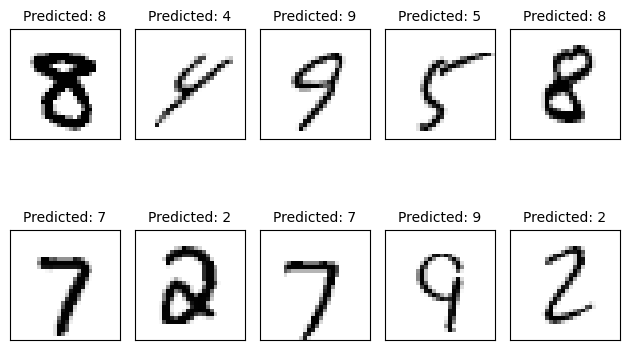

In [16]:
import matplotlib.pyplot as plt

# example_data is a NumPy array containing the examples and ground truth labels
# example_data[:, :-1] contains the examples (images)
# example_data[:, -1] contains the ground truth labels

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
model.eval()

for i in range(10):
    example_image = example_data[i][0]
    example_image_tensor = torch.tensor(example_image, dtype=torch.float32)
    example_image_tensor = example_image_tensor.view(1, -1)  # Reshape to (1, num_features)

    # Make a prediction using the trained model
    with torch.no_grad():
        output = model(example_image_tensor)
        _, predicted_label = torch.max(output, 1)
        predicted_label = predicted_label.item()  # Get the predicted label as a Python scalar

    # Plot the example image and set the title to show the predicted label
    ax[i].imshow(example_image.reshape(28, 28), cmap='Greys')
    ax[i].set_title(f'Predicted: {predicted_label}', fontsize=10)

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()